In [ ]:
import numpy as np
import pandas as pd

# **creating a synthetic Burgers' 2D dataset**

In [ ]:
import numpy as np
import pandas as pd


nx, ny, nt = 50, 50, 40
dx, dy, dt = 1/nx, 1/ny, 0.002
nu_base =0.002

x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
t_vals = np.linspace(0, 1, nt)
X, Y = np.meshgrid(x, y, indexing='ij')

u = np.zeros((nt, nx, ny))
v = np.zeros((nt, nx, ny))


u[0] = np.sin(np.pi * X) * np.cos(np.pi * Y)
v[0] = -np.cos(np.pi * X) * np.sin(np.pi * Y)


for n in range(0, nt - 1):

    nu = nu_base * (1 + 0.5 * np.sin(2 * np.pi * t_vals[n]))


    u_xx = (np.roll(u[n], -1, axis=0) - 2*u[n] + np.roll(u[n], 1, axis=0)) / dx**2
    u_yy = (np.roll(u[n], -1, axis=1) - 2*u[n] + np.roll(u[n], 1, axis=1)) / dy**2
    v_xx = (np.roll(v[n], -1, axis=0) - 2*v[n] + np.roll(v[n], 1, axis=0)) / dx**2
    v_yy = (np.roll(v[n], -1, axis=1) - 2*v[n] + np.roll(v[n], 1, axis=1)) / dy**2


    u[n + 1] = (
        u[n]
        + dt * (
            -u[n] * (np.roll(u[n], -1, axis=0) - np.roll(u[n], 1, axis=0)) / (2*dx)
            -v[n] * (np.roll(u[n], -1, axis=1) - np.roll(u[n], 1, axis=1)) / (2*dy)
            + nu * (u_xx + u_yy)
        )
    )

    v[n + 1] = (
        v[n]
        + dt * (
            -u[n] * (np.roll(v[n], -1, axis=0) - np.roll(v[n], 1, axis=0)) / (2*dx)
            -v[n] * (np.roll(v[n], -1, axis=1) - np.roll(v[n], 1, axis=1)) / (2*dy)
            + nu * (v_xx + v_yy)
        )
    )

noise_level = 0.05
u += noise_level * np.random.randn(*u.shape)
v += noise_level * np.random.randn(*v.shape)

data = []
for ti, t in enumerate(t_vals):
    for i in range(nx):
        for j in range(ny):
            data.append([x[i], y[j], t, u[ti, i, j], v[ti, i, j]])

df = pd.DataFrame(data, columns=["x", "y", "t", "u", "v"])
df.to_csv("synthetic_burgers2D_small.csv", index=False)

In [ ]:
df = pd.read_csv('synthetic_burgers2D_small.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       100000 non-null  float64
 1   y       100000 non-null  float64
 2   t       100000 non-null  float64
 3   u       100000 non-null  float64
 4   v       100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB


# **VISUALIZATION**

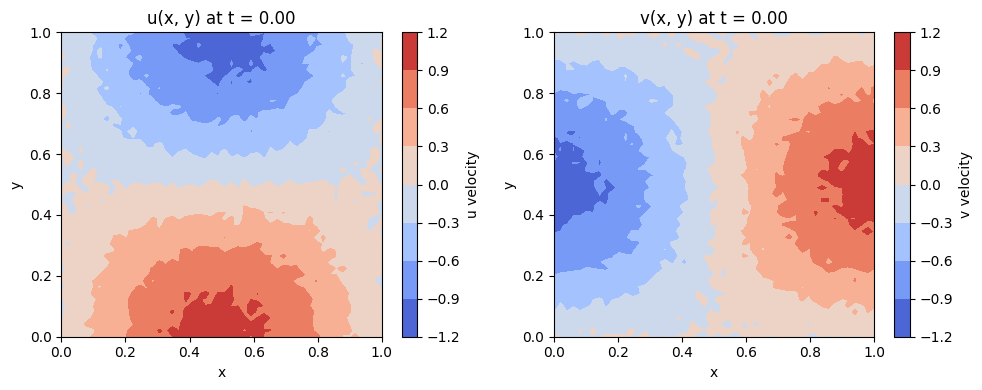

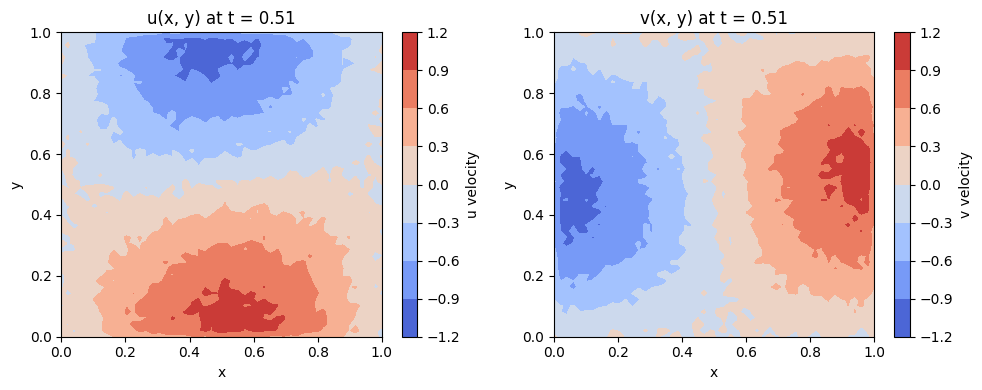

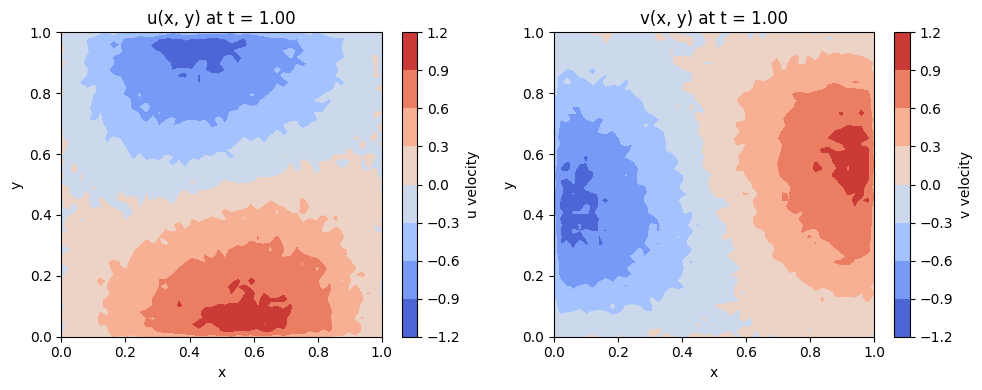

In [ ]:
import matplotlib.pyplot as plt

def plot_field(u_field, v_field, t_index):

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.contourf(X, Y, u_field[t_index], cmap="coolwarm")
    plt.colorbar(label="u velocity")
    plt.title(f"u(x, y) at t = {t_vals[t_index]:.2f}")
    plt.xlabel("x")
    plt.ylabel("y")


    plt.subplot(1, 2, 2)
    plt.contourf(X, Y, v_field[t_index], cmap="coolwarm")
    plt.colorbar(label="v velocity")
    plt.title(f"v(x, y) at t = {t_vals[t_index]:.2f}")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.tight_layout()
    plt.show()


for t_index in [0, nt//2, nt-1]:
    plot_field(u, v, t_index)


In [ ]:
df

,x,y,t,u,v
0,0.0,0.000000,0.0,0.001609,0.038052
1,0.0,0.020408,0.0,0.091461,-0.054063
2,0.0,0.040816,0.0,-0.011329,-0.121089
3,0.0,0.061224,0.0,-0.011608,-0.081388
4,0.0,0.081633,0.0,-0.044177,-0.289474
...,...,...,...,...,...
99995,1.0,0.918367,1.0,-0.105117,0.106819
99996,1.0,0.938776,1.0,-0.045663,0.084246
99997,1.0,0.959184,1.0,0.001102,0.051711
99998,1.0,0.979592,1.0,-0.018962,0.052301


the vectors for velocity field makes anticlockwise swirl at t=0

Velocity magnitude decreases toward the center, consistent with diffusion damping the motion.
This behavior is physically consistent with the 2D viscous Burgers’ equation — where nonlinear advection initially forms the pattern, and viscosity later smooths it into a stable, laminar rotational flow.

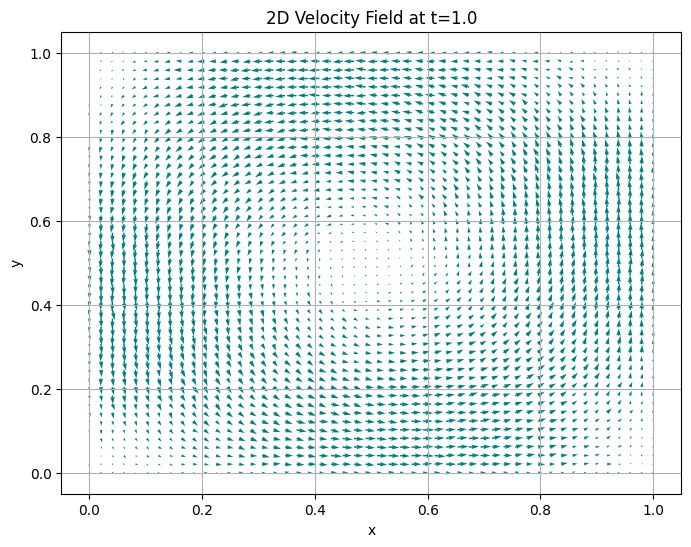

In [ ]:

t_snapshot = 1.0
df_t = df[np.isclose(df['t'], t_snapshot, atol=1e-3)]

x_unique = np.sort(df_t['x'].unique())
y_unique = np.sort(df_t['y'].unique())

X, Y = np.meshgrid(x_unique, y_unique)

U = df_t.pivot_table(index='y', columns='x', values='u').values
V = df_t.pivot_table(index='y', columns='x', values='v').values

plt.figure(figsize=(8,6))
plt.quiver(X, Y, U, V, color='teal')
plt.title(f'2D Velocity Field at t={t_snapshot}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


1. The blue curve (u(t)) is the horizontal velocity over time.

2. The orange curve (v(t)) is the vertical velocity over time.


3. At point

     (x=0.04,y=0.04)

     the flow consistently moves rightward (positive u) and downward (negative v), with small oscillations over time. The pattern is stable and smooth, indicating viscous damping and convergence toward a steady-state solution of the Burgers’ equation.

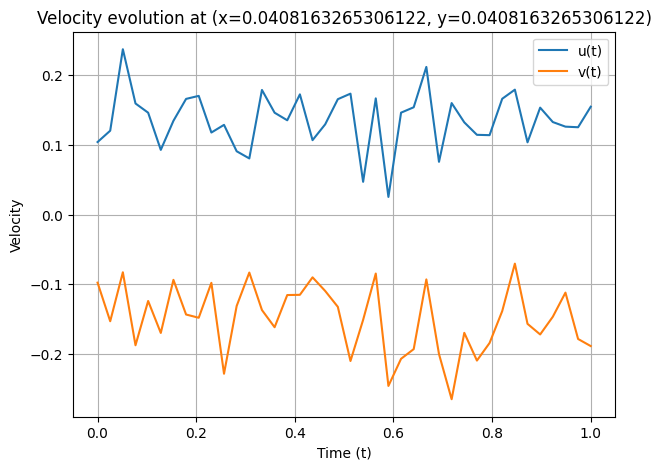

In [ ]:
x_point, y_point = df["x"][110], df["x"][110]  # center point
df_point = df[(np.isclose(df['x'], x_point, atol=1e-3)) &
              (np.isclose(df['y'], y_point, atol=1e-3))]

plt.figure(figsize=(7,5))
plt.plot(df_point['t'], df_point['u'], label='u(t)')
plt.plot(df_point['t'], df_point['v'], label='v(t)')
plt.xlabel('Time (t)')
plt.ylabel('Velocity')
plt.title(f"Velocity evolution at (x={x_point}, y={y_point})")
plt.legend()
plt.grid(True)
plt.show()



# **MAKING A PINN MODEL**

In [ ]:
X = df[['x', 'y', 't']].values
uv = df[['u', 'v']].values

NETWORK MODEL WITH 3 HIDDEN LAYERS, TAKES 3 INPUTS (X, Y, T) AND OUTPUTS 2 (U, V)

In [ ]:
import torch
import torch.nn as nn
class Network(nn.Module):
  def __init__(self, layers = [3, 64,64,32, 2]): #3 inputs, 2 outputs with 3 hidden layers in between
      super().__init__()
      self.layers = nn.ModuleList()
      for i in range(len(layers)-1):
          self.layers.append(nn.Linear(layers[i], layers[i+1]))
          self.activation = nn.Tanh()
  def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.activation(layer(x))
        return self.layers[-1](x)


HERE,
1. in residuals function, we compute the Physics-Informed Residuals.
     This uses automatic differentiation to get derivatives of the NN’s output.
     Then we compute the residuals:

2. lossResiduals function calculates the loss.
   this function has 2 parts, the dataset loss and physics loss
   if the pass physics parameter as True then it computes the dataset loss and PINN loss both, and if it is False then it only computes dataset loss and our neural network act as a simple plain NN not PINN.

In [ ]:
class PINN_2D_Burgers():
    def __init__(self, X, uv, lb, ub, nu=0.01/np.pi, physics=True):
        self.lb = torch.tensor(lb).float()
        self.ub = torch.tensor(ub).float()
        self.physics = physics
        self.nu = nu

        self.x = torch.tensor(X[:, 0:1], requires_grad=True).float()
        self.y = torch.tensor(X[:, 1:2], requires_grad=True).float()
        self.t = torch.tensor(X[:, 2:3], requires_grad=True).float()
        self.u = torch.tensor(uv[:, 0:1]).float()
        self.v = torch.tensor(uv[:, 1:2]).float()

        self.network = Network()
        self.optimizer = torch.optim.Adam(self.network.parameters(), lr=0.001)

    def makeNetwork(self, x, y, t):
        X = torch.cat([x, y, t], dim=1)
        return self.network(X)

    def residuals(self, x, y, t):
        uv = self.makeNetwork(x, y, t)
        u = uv[:, 0:1]
        v = uv[:, 1:2]

        u_t = torch.autograd.grad(u, t, grad_outputs=torch.ones_like(u), create_graph=True)[0]
        u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
        u_y = torch.autograd.grad(u, y, grad_outputs=torch.ones_like(u), create_graph=True)[0]
        u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True)[0]
        u_yy = torch.autograd.grad(u_y, y, grad_outputs=torch.ones_like(u_y), create_graph=True)[0]

        v_t = torch.autograd.grad(v, t, grad_outputs=torch.ones_like(v), create_graph=True)[0]
        v_x = torch.autograd.grad(v, x, grad_outputs=torch.ones_like(v), create_graph=True)[0]
        v_y = torch.autograd.grad(v, y, grad_outputs=torch.ones_like(v), create_graph=True)[0]
        v_xx = torch.autograd.grad(v_x, x, grad_outputs=torch.ones_like(v_x), create_graph=True)[0]
        v_yy = torch.autograd.grad(v_y, y, grad_outputs=torch.ones_like(v_y), create_graph=True)[0]

        f_u = u_t + (u * u_x + v * u_y) - self.nu * (u_xx + u_yy)
        f_v = v_t + (u * v_x + v * v_y) - self.nu * (v_xx + v_yy)

        return f_u, f_v

    def lossResidual(self):
        uv_pred = self.makeNetwork(self.x, self.y, self.t)
        u_pred = uv_pred[:, 0:1]
        v_pred = uv_pred[:, 1:2]
        f_u, f_v = self.residuals(self.x, self.y, self.t)

        loss = torch.mean((self.u - u_pred)**2) + torch.mean((self.v - v_pred)**2)
        if self.physics:
            loss += torch.mean(f_u**2) + torch.mean(f_v**2)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def train(self, epochs=1000):
        loss_history = []
        for epoch in range(epochs):
            loss = self.lossResidual()
            loss_history.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
        return loss_history

    def predict(self, X_star):
        x = torch.tensor(X_star[:, 0:1], requires_grad=True).float()
        y = torch.tensor(X_star[:, 1:2], requires_grad=True).float()
        t = torch.tensor(X_star[:, 2:3], requires_grad=True).float()
        uv_pred = self.makeNetwork(x, y, t)
        f_u, f_v = self.residuals(x, y, t)
        return uv_pred.detach().numpy(), f_u.detach().numpy(), f_v.detach().numpy()

# **TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as n
X = df[['x', 'y', 't']].values
uv = df[['u', 'v']].values


X_train, X_test, uv_train, uv_test = train_test_split(
    X, uv, test_size=0.2, random_state=42
)

lb = X_train.min(0)
ub = X_train.max(0)

In [ ]:
model = PINN_2D_Burgers(X_train, uv_train, lb, ub)


Training with physics loss

In [ ]:
model = PINN_2D_Burgers(X_train, uv_train, lb, ub, True)
pinn = model.train(epochs=500 )

Epoch 0, Loss: 0.543468
Epoch 100, Loss: 0.143308
Epoch 200, Loss: 0.116894
Epoch 300, Loss: 0.114012
Epoch 400, Loss: 0.111836


training without physics loss, simple NN

In [ ]:
model2 = PINN_2D_Burgers(X_train, uv_train, lb, ub, physics= False)
no_pinn = model2.train(epochs=500 )

Epoch 0, Loss: 0.532889
Epoch 100, Loss: 0.100111
Epoch 200, Loss: 0.058151
Epoch 300, Loss: 0.020416
Epoch 400, Loss: 0.016111


In [ ]:

uv_pred_pinn, f_u_pinn, f_v_pinn = model.predict(X_test)
uv_pred_no_pinn, f_u_no_pinn, f_v_no_pinn = model2.predict(X_test)

u_true = uv_test[:, 0]
v_true = uv_test[:, 1]

u_pred_pinn = uv_pred_pinn[:, 0]
v_pred_pinn = uv_pred_pinn[:, 1]
u_pred_no_pinn = uv_pred_no_pinn[:, 0]
v_pred_no_pinn = uv_pred_no_pinn[:, 1]


# **VISUALIZATION OF TRAINING AND PREDICTED VALUES**

In [ ]:
error_pinn = np.mean((u_true - u_pred_pinn)**2 + (v_true - v_pred_pinn)**2)
error_no_pinn = np.mean((u_true - u_pred_no_pinn)**2 + (v_true - v_pred_no_pinn)**2)

print(error_pinn)
print(error_no_pinn)

0.10879986546256178
0.013626469846165218


In [ ]:
import plotly.graph_objects as go

epochs = list(range(len(pinn)))
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=pinn, mode='lines', name='Physics Informed Neural Network'))
fig.update_layout(
    title='Loss vs. Epochs',
    xaxis=dict(title='Epochs'),
    yaxis=dict(title='Loss'),
    legend=dict(x=0.7, y=1.0),
    margin=dict(l=20, r=20, t=40, b=20),
    hovermode='x unified'
)
fig.show()


In [ ]:
epochs = list(range(len(pinn)))
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=no_pinn, mode='lines', name='Not Physics Informed Neural Network'))
fig.update_layout(
    title='Loss vs. Epochs',
    xaxis=dict(title='Epochs'),
    yaxis=dict(title='Loss'),
    legend=dict(x=0.7, y=1.0),
    margin=dict(l=20, r=20, t=40, b=20),
    hovermode='x unified'
)
fig.show()

here, the normal neural network model is working better than the PINN one lol
i think the reason for this is maybe dataset. i think i've not added noise in  dataset correctly.

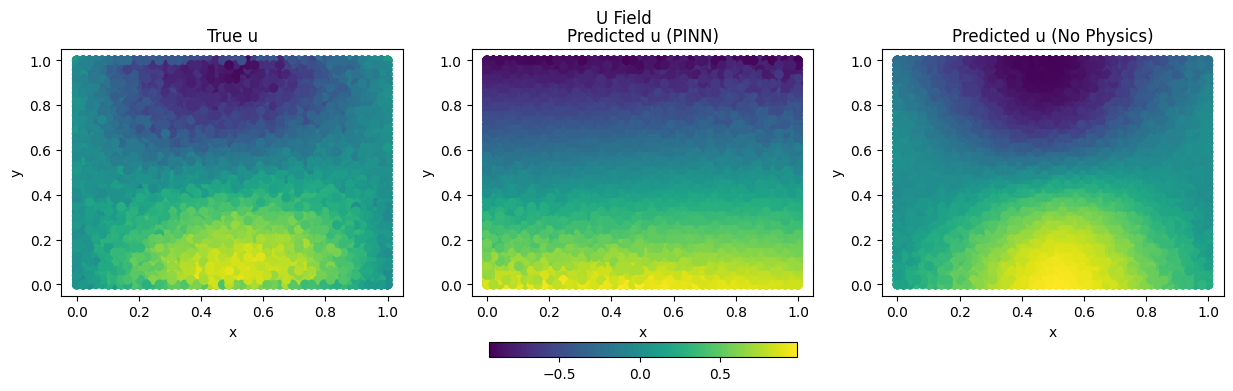

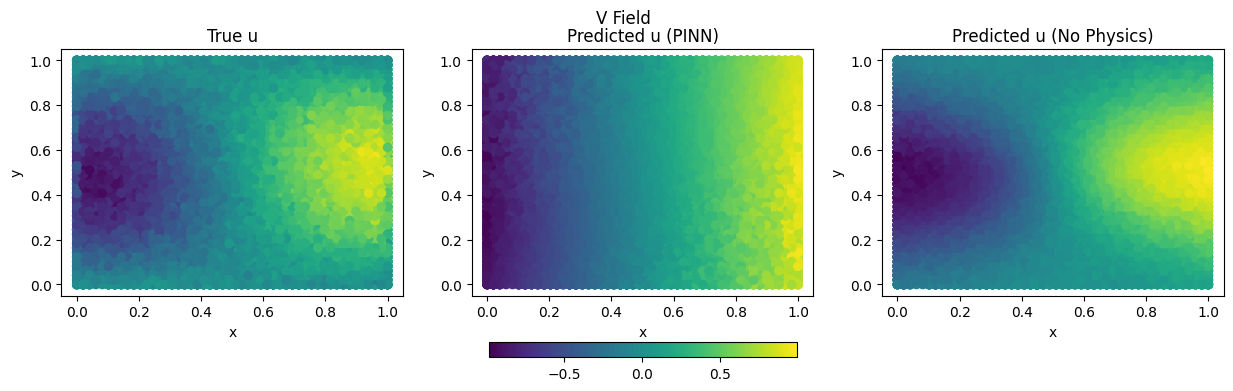

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(X_test, u_true, u_pinn, u_nopinn, title="U field comparison"):
    x, y = X_test[:,0], X_test[:,1]
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    im0 = axes[0].scatter(x, y, c=u_true, cmap='viridis')
    axes[0].set_title("True u")
    im1 = axes[1].scatter(x, y, c=u_pinn, cmap='viridis')
    axes[1].set_title("Predicted u (PINN)")
    im2 = axes[2].scatter(x, y, c=u_nopinn, cmap='viridis')
    axes[2].set_title("Predicted u (No Physics)")
    for ax in axes: ax.set_xlabel('x'); ax.set_ylabel('y')
    fig.colorbar(im2, ax=axes, orientation='horizontal', fraction=0.05)
    plt.suptitle(title)
    plt.show()

plot_comparison(X_test, u_true, u_pred_pinn, u_pred_no_pinn, "U Field")
plot_comparison(X_test, v_true, v_pred_pinn, v_pred_no_pinn, "V Field")
